![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [25]:
# Start your code here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin

# Read in the data
mens = pd.read_csv('men_results.csv')
womens = pd.read_csv('women_results.csv')  

print(mens.head())
print(womens.head())

   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  
   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3           3  1969-11-02     Italy    Denmark           3           1   
4           4  1975-08-25  Thailand  Australia           3           2   

         tournament  
0   

In [18]:
# tournament
#print(mens['tournament'].unique())

# matches grouped by tournament
mens_tour = mens.groupby('tournament').count()
womens_tour = womens.groupby('tournament').count()
#print(mens_tour)
#print(womens_tour)

# FIFA World Cup mens matches
mens_wc = mens[mens['tournament'] == 'FIFA World Cup']

# FIFA World Cup womens matches
womens_wc = womens[womens['tournament'] == 'FIFA World Cup']

# mens FIFA matches since 2002-01-01
mens_2002 = mens_wc[mens_wc['date'] >= '2002-01-01'].copy()
# womens FIFA matches since 2002-01-01
womens_2002 = womens_wc[womens_wc['date'] >= '2002-01-01'].copy()

# total goals scored in mens FIFA matches since 2002-01-01
mens_2002.loc[:,'total_goals'] = mens_2002['home_score'] + mens_2002['away_score']
# total goals scored in womens FIFA matches since 2002-01-01
womens_2002.loc[:,'total_goals'] = womens_2002['home_score'] + womens_2002['away_score']


print(mens_2002.head())
print(womens_2002.head())

       Unnamed: 0        date            home_team     away_team  home_score  \
25164       25164  2002-05-31               France       Senegal           0   
25165       25165  2002-06-01              Germany  Saudi Arabia           8   
25166       25166  2002-06-01  Republic of Ireland      Cameroon           1   
25167       25167  2002-06-01              Uruguay       Denmark           1   
25168       25168  2002-06-02            Argentina       Nigeria           1   

       away_score      tournament  total_goals  
25164           1  FIFA World Cup            1  
25165           0  FIFA World Cup            8  
25166           1  FIFA World Cup            2  
25167           2  FIFA World Cup            3  
25168           0  FIFA World Cup            1  
      Unnamed: 0        date      home_team    away_team  home_score  \
1600        1600  2003-09-20        Nigeria  North Korea           0   
1601        1601  2003-09-20         Norway       France           2   
1602     

In [19]:
# function to achieve the above

def process_data(df, tournament, date):
    df_tournament = df[df['tournament'] == tournament]
    df_tournament = df_tournament[df_tournament['date'] >= date].copy()
    df_tournament.loc[:, 'total_goals'] = df_tournament['home_score'] + df_tournament['away_score']
    return df_tournament

# Process mens and womens data
mens_2002 = process_data(mens, 'FIFA World Cup', '2002-01-01')
womens_2002 = process_data(womens, 'FIFA World Cup', '2002-01-01')

print(mens_2002.head())
print(womens_2002.head())


       Unnamed: 0        date            home_team     away_team  home_score  \
25164       25164  2002-05-31               France       Senegal           0   
25165       25165  2002-06-01              Germany  Saudi Arabia           8   
25166       25166  2002-06-01  Republic of Ireland      Cameroon           1   
25167       25167  2002-06-01              Uruguay       Denmark           1   
25168       25168  2002-06-02            Argentina       Nigeria           1   

       away_score      tournament  total_goals  
25164           1  FIFA World Cup            1  
25165           0  FIFA World Cup            8  
25166           1  FIFA World Cup            2  
25167           2  FIFA World Cup            3  
25168           0  FIFA World Cup            1  
      Unnamed: 0        date      home_team    away_team  home_score  \
1600        1600  2003-09-20        Nigeria  North Korea           0   
1601        1601  2003-09-20         Norway       France           2   
1602     

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

* unpaired two-sample t-test or Wilcoxon-Mann Whitney (non-parametric equivalent)
* check assumptions of t-test:
  * **independence** - assumed
  * **normality**
  * **equal variance** - levenes
  * **sample size**

In [30]:
# Check normality
# null hypothesis: data is normal
print(stats.shapiro(mens_2002['total_goals']))
print(stats.shapiro(womens_2002['total_goals']))

if stats.shapiro(mens_2002['total_goals'])[1] < 0.1:
    print('Null hypothesis rejected; Mens data is not normal')

if stats.shapiro(womens_2002['total_goals'])[1] < 0.1:
    print('Null hypothesis rejected; Womens data is not normal')



ShapiroResult(statistic=0.9266489744186401, pvalue=8.894154401688226e-13)
ShapiroResult(statistic=0.8491013050079346, pvalue=3.8905201759850683e-13)
Mens data is not normal
Womens data is not normal


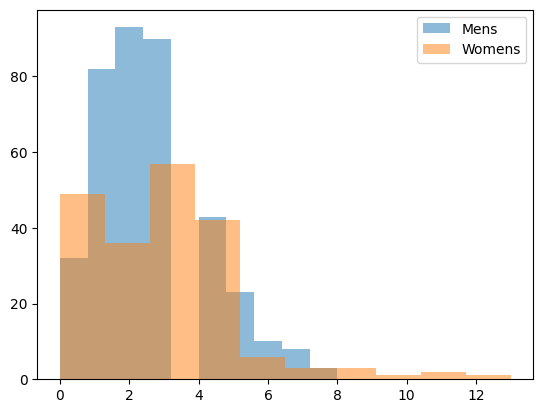

In [31]:
# Plot histograms
plt.hist(mens_2002['total_goals'], alpha=0.5, label='Mens')
plt.hist(womens_2002['total_goals'], alpha=0.5, label='Womens')
plt.legend(loc='upper right')
plt.show()

In [28]:
# Check equal variances
levene_test_stat, levene_p_value = stats.levene(mens_2002['total_goals'], womens_2002['total_goals'])

print(f"Levene's Test Statistic: {levene_test_stat}")
print(f"Levene's Test p-value: {levene_p_value}")

if levene_p_value < 0.10:
    print("We reject the null hypothesis that the variances are equal.")
else:
    print("We fail to reject the null hypothesis that the variances are equal.")

Levene's Test Statistic: 0.9077842110769139
Levene's Test p-value: 0.3410985424749826
We fail to reject the null hypothesis that the variances are equal.


In [32]:


# Calculate the mean number of goals scored in men's and women's matches
mean_mens_goals = mens_2002['total_goals'].mean()
mean_womens_goals = womens_2002['total_goals'].mean()

print(f"Mean number of goals in men's matches: {mean_mens_goals}")
print(f"Mean number of goals in women's matches: {mean_womens_goals}")

# Perform a one-sided Wilcoxon-Mann-Whitney test
u_stat, p_value = stats.mannwhitneyu(womens_2002['total_goals'], mens_2002['total_goals'], alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


Mean number of goals in men's matches: 2.5130208333333335
Mean number of goals in women's matches: 2.98
U-statistic: 43273.0
P-value: 0.005106609825443641


In [33]:

# Check if the p-value is less than the significance level
if p_value < 0.10:
    print("We reject the null hypothesis and conclude that the mean number of goals scored in women's international soccer matches is greater than men's.")
else:
    print("We fail to reject the null hypothesis and cannot conclude that the mean number of goals scored in women's international soccer matches is greater than men's.")

We reject the null hypothesis and conclude that the mean number of goals scored in women's international soccer matches is greater than men's.


In [34]:
# store results in dictionary

result_dict = {'p_val': p_value, 'result': "reject"}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
